<a href="https://colab.research.google.com/github/AmiAnurag/Steel-Industry-Energy-Consumption-Optimization/blob/main/Steel_Industry_Energy_Consumption_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data into a pandas DataFrame
# df = pd.read_csv('/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv')  # Replace 'your_data.csv' with the actual filename or path
df=pd.read_csv('Steel_industry_data.csv')
# Display the first few rows of the DataFrame
# print(df.head())

# Summary statistics
df.describe()

# Check for missing values
print(df.isnull().sum())

# EDA - Histogram of Usage_kWh
fig = px.histogram(df, x='Usage_kWh', nbins=20)
fig.update_layout(title='Distribution of Usage_kWh', xaxis_title='Usage_kWh', yaxis_title='Frequency')
fig.show()

# EDA - Boxplot of Usage_kWh by Load Type
fig = px.box(df, x='Load_Type', y='Usage_kWh')
fig.update_layout(title='Usage_kWh by Load Type', xaxis_title='Load Type', yaxis_title='Usage_kWh')
fig.show()

# EDA - Bar chart of Week status
fig = px.bar(df, x='WeekStatus', color='WeekStatus')
fig.update_layout(title='Count of Week status', xaxis_title='Week status', yaxis_title='Count')
fig.show()

# EDA - Bar chart of Day of week
fig = px.bar(df, x='Day_of_week', color='Day_of_week')
fig.update_layout(title='Count of Day of week', xaxis_title='Day of week', yaxis_title='Count')
fig.show()



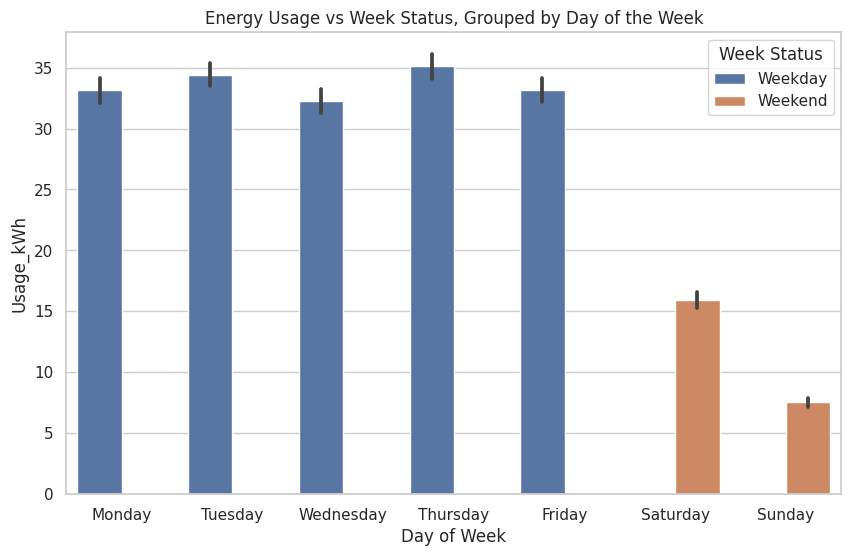

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
  # Replace 'your_data.csv' with the actual filename or path

# EDA - Grouped bar plot of usage vs week status, grouped by day of the week using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Day_of_week', y='Usage_kWh', hue='WeekStatus')
plt.title('Energy Usage vs Week Status, Grouped by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Usage_kWh')
plt.legend(title='Week Status')
plt.show()


In [3]:
cat = df.select_dtypes(include='object').columns.tolist()

for col in df[cat]:
    print(f"\033[94m\033[1m")
    print(col,"\n")
    print(f"\033[91m\033[1m")
    print(df[col].value_counts())
    print(f"\033[92m\033[1m")
    print("======="*5)


date 


01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: date, Length: 35040, dtype: int64


WeekStatus 


Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64


Day_of_week 


Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64


Load_Type 


Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64



In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Calculate correlation matrix
correlation_matrix = df.corr()

# Generate a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Add title and display the plot
plt.title("Correlation Heatmap")
plt.show()


In [45]:
import plotly.express as px

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Create scatter plot
fig_scatter = px.scatter(df, x='Lagging_Current_Power_Factor', y='Usage_kWh', title='Usage_kWh vs Lagging Current Power_Factor')

# Display the scatter plot
fig_scatter.show()


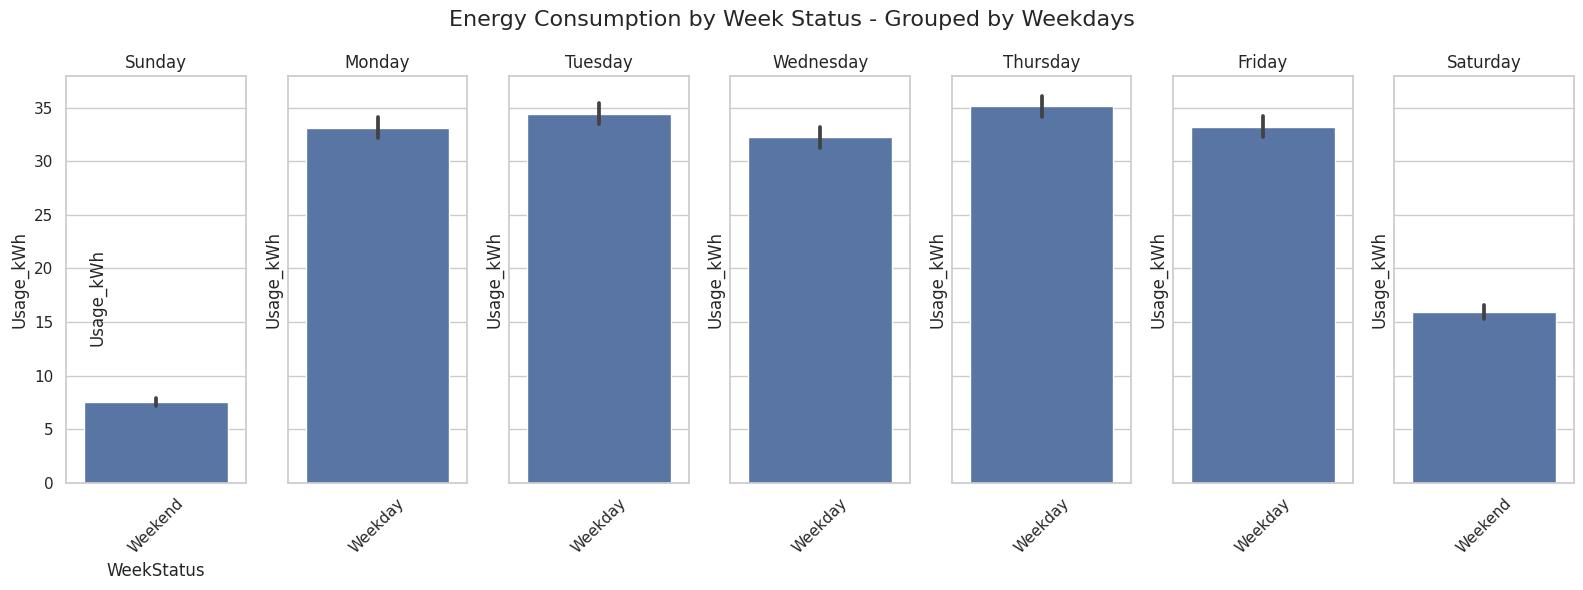

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16, 6), sharey=True)

# Iterate over each day of the week
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for i, day in enumerate(weekdays):
    # Subset the data for the current day
    subset = df[df['Day_of_week'] == day]

    # Create bar plot for the current day
    sns.barplot(data=subset, x='WeekStatus', y='Usage_kWh', ax=axes[i])

    # Set the title for the subplot
    axes[i].set_title(day)

    # Remove x-axis label for all but the first subplot
    if i > 0:
        axes[i].set_xlabel('')

    # Rotate x-axis tick labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Set the common y-axis label
fig.text(0.06, 0.5, 'Usage_kWh', va='center', rotation='vertical')

# Set the main title for the figure
fig.suptitle('Energy Consumption by Week Status - Grouped by Weekdays', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


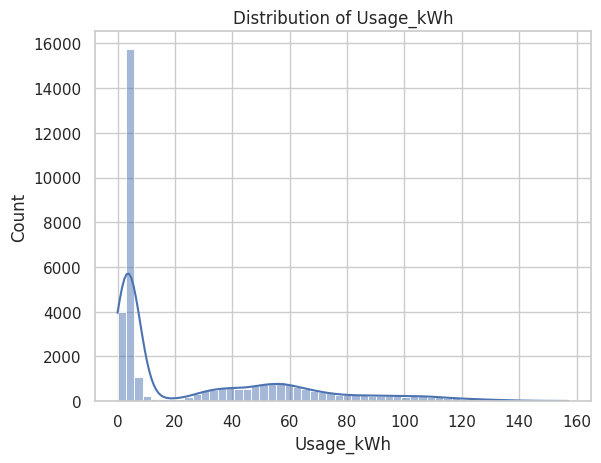

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Create histogram
sns.histplot(data=df, x='Usage_kWh', kde=True)
plt.title('Distribution of Usage_kWh')
plt.show()


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataset is stored in a pandas DataFrame called 'df'
df=pd.read_csv('Steel_industry_data.csv')
# Split the data into features (X) and target variable (y)
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type'])
# Select all columns except 'Usage_kWh' as features and 'Usage_kWh' as the target variable
features = df.columns.drop(['Usage_kWh','date'])
target = 'Usage_kWh'
X = df[features]
y = df[target]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store the results
results = []

# Define the regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Fit the regression models and evaluate their performance
for model_name, model in regressors.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)

    # Append the results to the list
    results.append({'Model': model_name, 'MSE': mse, 'R-squared': r2})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results in a table format

print(results_df)

                          Model         MSE  R-squared
0             Linear Regression   17.842279   0.984304
1      Decision Tree Regression    2.423932   0.997868
2      Random Forest Regression    1.121040   0.999014
3     Support Vector Regression  816.612491   0.281608
4  Gradient Boosting Regression    8.402126   0.992608


In [71]:
results_df

,Model,MSE,R-squared
0,Linear Regression,17.842279,0.984304
1,Decision Tree Regression,2.423932,0.997868
2,Random Forest Regression,1.121040,0.999014
3,Support Vector Regression,816.612491,0.281608
4,Gradient Boosting Regression,8.402126,0.992608


In [25]:
y_pred

array([  2.8794,  60.5493, 121.818 , ..., 147.0909,   3.6829,  38.6807])

In [30]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000
